In [1]:
import numpy as np
import pandas as pd 

#Dataset link
#https://www.kaggle.com/paultimothymooney/coronavirus-covid19-mortality-rate-by-country
df = pd.read_csv("./coronavirus-covid19-mortality-rate-by-country/global_covid19_mortality_rates.csv");
df

,Unnamed: 0,Country,Confirmed,Deaths,Mortality Rate,Latitude,Longitude,Country_Code
0,0,Afghanistan,1176.0,40.0,3.40,33.939110,67.709953,AF
1,1,Albania,634.0,27.0,4.26,41.153332,20.168331,AL
2,2,Algeria,2910.0,402.0,13.81,28.033886,1.659626,DZ
3,3,Andorra,723.0,37.0,5.12,42.546245,1.601554,AD
4,4,Angola,25.0,2.0,8.00,-11.202692,17.873887,AO
...,...,...,...,...,...,...,...,...
168,168,Vietnam,268.0,0.0,0.00,14.058324,108.277199,VN
169,169,Western Sahara,6.0,0.0,0.00,24.215527,-12.885834,EH
170,170,Yemen,1.0,0.0,0.00,15.552727,48.516388,YE
171,171,Zambia,74.0,3.0,4.05,-13.133897,27.849332,ZM


In [2]:
#Sorts data by Confrimed cases from Highest to Lowest
df = df.sort_values(by=['Confirmed'], ascending=False)

#reset index
df.index = range(0,len(df))

#Makes new Dataframe that holds top 5 countries of Covid-19 confirmed cases
top5 = df.drop([i for i in range(5,len(df))])

#make new Dataframe that holds all countries not in top 5
notTop = df.drop([0,1,2,3,4])

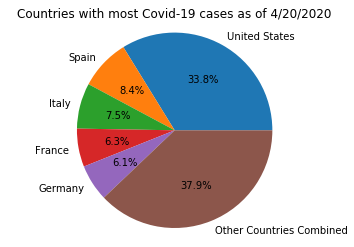

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

#Pie Chart Labels, and Sizes 

#Labels are the top 5 countries names, + a section for all other countries
pieLabels = top5.Country.tolist() + ['Other Countries Combined']
#Sizes are the Confirmed Cases of top 5 countries + the sum of all the other countires
pieSizes = top5.Confirmed.tolist() + [notTop.Confirmed.sum()]

fig, ax = plt.subplots()
ax.pie(pieSizes, labels=pieLabels, autopct='%1.1f%%')
ax.axis('equal')
ax.set_title('Countries with most Covid-19 cases as of 4/20/2020')
plt.show()
fig.savefig("PieChart.png", dpi = 400)

In [5]:
df = df.where(df.Confirmed > 10000)
df = df.dropna()
df.to_csv(r'C:\Users\harpr\Documents\CSCI 191T\Final\covid_countries.csv', index = False)